In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(1)

In [2]:
max_len = 5

def generate_segment(start_x: int, end_x: int, start_y: int = 0, end_y: int = 50):
    first_x, first_y = random.randint(start_x, end_x), random.randint(start_y, end_y)
    end_x = first_x + max_len * random.random()
    end_y = first_y + (max_len**2 - (end_x - first_x)**2)**(0.5) * random.choice((-1, 1))
    return first_x, first_y, end_x, end_y


def generate_segments(num_segments: int, num_ranges: int,
                      start_x: int = 0, start_y: int = 0,
                      end_x: int = 100, end_y: int = 50):
    x_ratio = end_x - start_x
    segments = []

    range_len = x_ratio // num_ranges

    borders_non_overlapping = [start_x + ind * range_len for ind in range(num_ranges)] + [end_x]
    borders_overlapping = [start_x + range_len // 2 + ind * range_len for ind in range(num_ranges)]
    for ind in range(num_ranges):
        segments.extend([generate_segment(borders_non_overlapping[ind], borders_non_overlapping[ind + 1]) for seg in range(num_segments)])


    for ind in range(num_ranges - 1):
        segments.extend([generate_segment(borders_overlapping[ind], borders_overlapping[ind + 1]) for seg in range(num_segments)])

    return segments

In [3]:
def visualize_segments(segments: list):
    fig = plt.figure(figsize=(20, 10))
    for segment in segments:
        plt.plot((segment[0], segment[2]), (segment[1], segment[3]), linestyle="-")

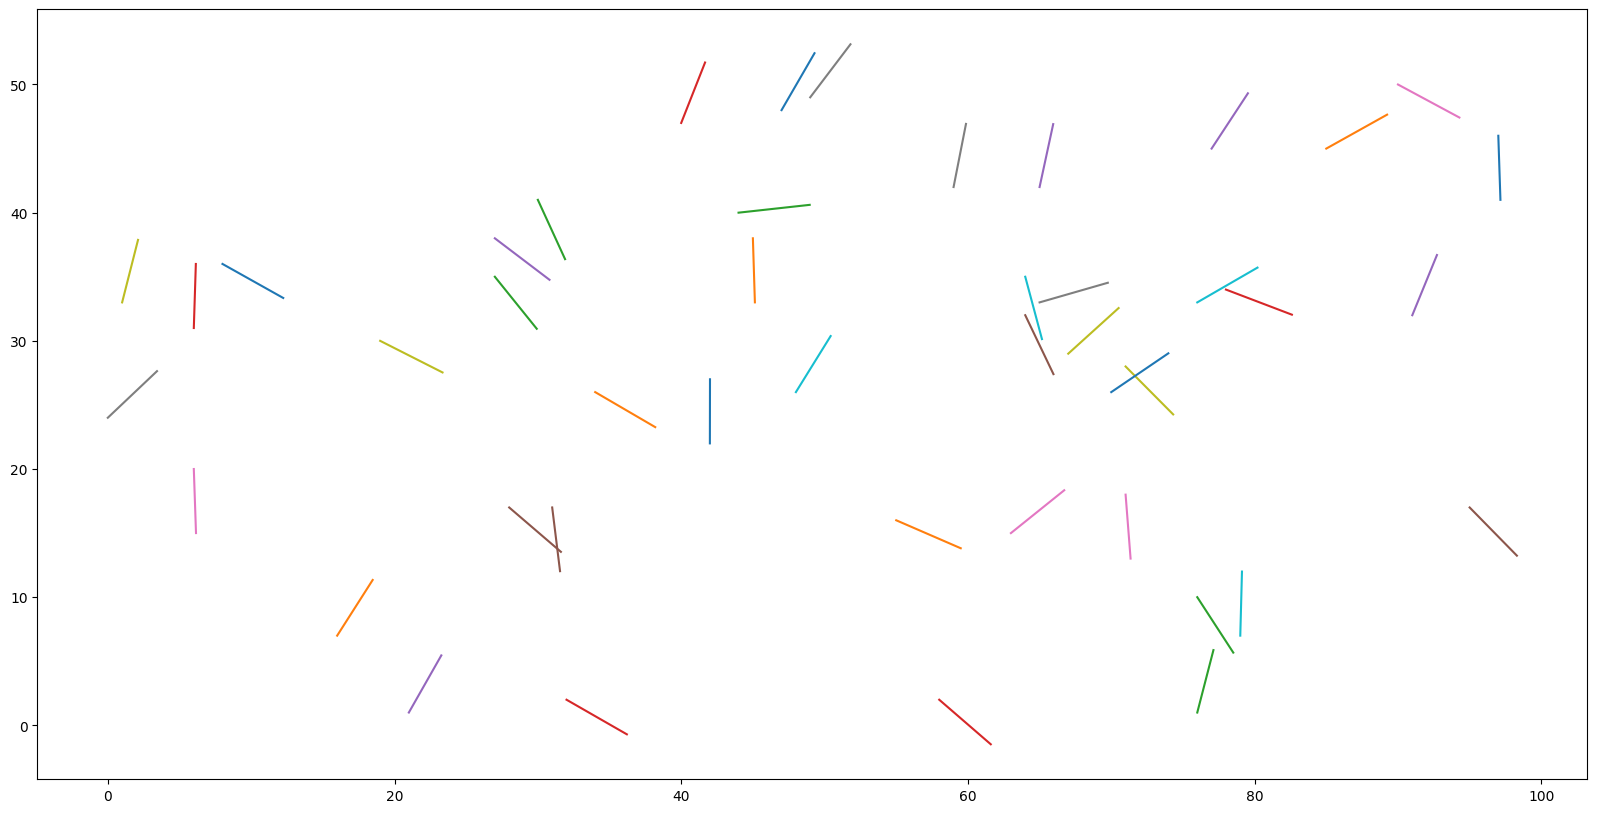

In [4]:
segments = generate_segments(9, 3)
visualize_segments(segments)

In [8]:
def to_cpp_code(segments):
    code_str = 'std::vector<Segment> segments = {'
    offset_len = len(code_str)
    is_first = True
    for segment in segments:
        segment_str = (' ' * offset_len if not is_first else '') + f'Segment(Point({segment[0]}, {segment[1]}), Point({segment[2]}, {segment[3]})),\n'
        code_str += segment_str
        is_first = False
    code_str = code_str[:-2] + '};'
    return code_str

In [8]:
print(to_cpp_code(segments))

std::vector<Segment> segments = {Segment(Point(13, 36), Point(17.394649504991484, 33.61524514293857)),
                                 Segment(Point(18, 6), Point(22.520089023096453, 3.8625259713196627)),
                                 Segment(Point(7, 36), Point(10.736326173440219, 39.322629489676146)),
                                 Segment(Point(8, 4), Point(10.501857369159433, 8.329054135071845)),
                                 Segment(Point(27, 32), Point(30.38631456184457, 35.67870543645987)),
                                 Segment(Point(0, 7), Point(2.2115716605621443, 11.484300479472623)),
                                 Segment(Point(22, 19), Point(24.696476742602986, 23.210583472228187)),
                                 Segment(Point(31, 7), Point(34.238341209210915, 10.809612344153456)),
                                 Segment(Point(24, 13), Point(26.7844428272499, 17.152936086887998)),
                                 Segment(Point(32, 12), Point(36.935090725247